In [1]:
import pandas as pd
import numpy as np

In [3]:
meta_data = pd.read_csv('./Data_Entry_2017.csv')
bbox_list = pd.read_csv('./BBox_List_2017.csv')
train_valid_txt = './train_val_list.txt'
test_txt = './test_list.txt'

In [3]:
meta_data.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [4]:
def get_labels(pic_id):
    labels = meta_data.loc[meta_data["Image Index"]==pic_id,"Finding Labels"]
    return labels.tolist()[0].split("|")

In [19]:
with open(train_valid_txt, "r") as f:
    train_valid_list = [ i.strip() for i in f.readlines()]
label_eight = list(np.unique(bbox_list["Finding Label"])) + ["No Finding"]

In [20]:
import numpy as np
valid_list = np.random.choice(train_valid_list, 5000, replace=False).tolist()

In [21]:
valid_list = set(valid_list)
train_valid_list = set(train_valid_list)

In [24]:
train_list = train_valid_list - valid_list

['00008697_000.png',
 '00018465_002.png',
 '00001199_005.png',
 '00010449_006.png',
 '00018996_012.png',
 '00005870_001.png',
 '00012414_000.png',
 '00016778_032.png',
 '00006220_003.png',
 '00004501_002.png',
 '00030753_000.png',
 '00019169_023.png',
 '00028811_003.png',
 '00021895_006.png',
 '00011723_020.png',
 '00025998_001.png',
 '00015041_007.png',
 '00011877_003.png',
 '00019730_022.png',
 '00014233_000.png',
 '00008232_015.png',
 '00019753_011.png',
 '00021982_004.png',
 '00029397_000.png',
 '00014407_000.png',
 '00005740_005.png',
 '00012733_004.png',
 '00001371_003.png',
 '00018972_018.png',
 '00011467_000.png',
 '00002072_005.png',
 '00021091_008.png',
 '00006920_004.png',
 '00020093_000.png',
 '00008734_000.png',
 '00011632_027.png',
 '00001686_000.png',
 '00014717_005.png',
 '00026024_022.png',
 '00000305_002.png',
 '00017158_042.png',
 '00000545_009.png',
 '00026968_000.png',
 '00006457_000.png',
 '00016309_002.png',
 '00003383_005.png',
 '00001872_005.png',
 '00017630_00

In [6]:
train_valid_y = []
for tid in train_valid_list:
    train_valid_y.append(get_labels(tid))

In [10]:
from sklearn import preprocessing
encoder = preprocessing.MultiLabelBinarizer()
encoder.fit(train_valid_y)
output = encoder.transform(train_valid_y)
encoder.classes_

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Hernia', 'Infiltration',
       'Mass', 'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'], dtype=object)

In [16]:
dis2idx = {
    'Atelectasis': 0,
    'Cardiomegaly' :1,
     'Consolidation' :2,
    'Edema' : 3,
    'Effusion' : 4,
    'Emphysema' : 5,
    'Fibrosis' : 6,
    'Hernia' : 7,
    'Infiltration' : 8,
    'Mass' : 9,
    'No Finding' : 10,
    'Nodule' : 11,
    'Pleural_Thickening' :12,
    'Pneumonia' : 13,
    'Pneumothorax' : 14
}

In [20]:
idx2dis = {v: k for k, v in dis2idx.iteritems()}

{0: 'Atelectasis',
 1: 'Cardiomegaly',
 2: 'Consolidation',
 3: 'Edema',
 4: 'Effusion',
 5: 'Emphysema',
 6: 'Fibrosis',
 7: 'Hernia',
 8: 'Infiltration',
 9: 'Mass',
 10: 'No Finding',
 11: 'Nodule',
 12: 'Pleural_Thickening',
 13: 'Pneumonia',
 14: 'Pneumothorax'}

In [22]:
import pickle as pkl
with open("./train_val_y_onehot.pkl","wb") as f:
    pkl.dump(output, f)

In [24]:
with open(test_txt, "r") as f:
    test_list = [ i.strip() for i in f.readlines()]

In [25]:
test_y = []
for tid in test_list:
    test_y.append(get_labels(tid))

In [26]:
output_test = encoder.transform(test_y)


In [34]:
with open("./test_y_onehot.pkl","wb") as f:
    pkl.dump(output_test, f)

In [42]:
import torch
torch.from_numpy(output_test[0]).type(torch.FloatTensor)

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.])

In [46]:
from PIL import Image
import torch
from torchvision import transforms
from torchvision import utils

In [53]:
sample = "./images/00000013_005.png"
img= Image.open(sample)


<PIL.PngImagePlugin.PngImageFile image mode=L size=1024x1024 at 0x7F5081884710>


In [93]:
trans = transforms.Compose([
    transforms.CenterCrop((512, ))
]
)

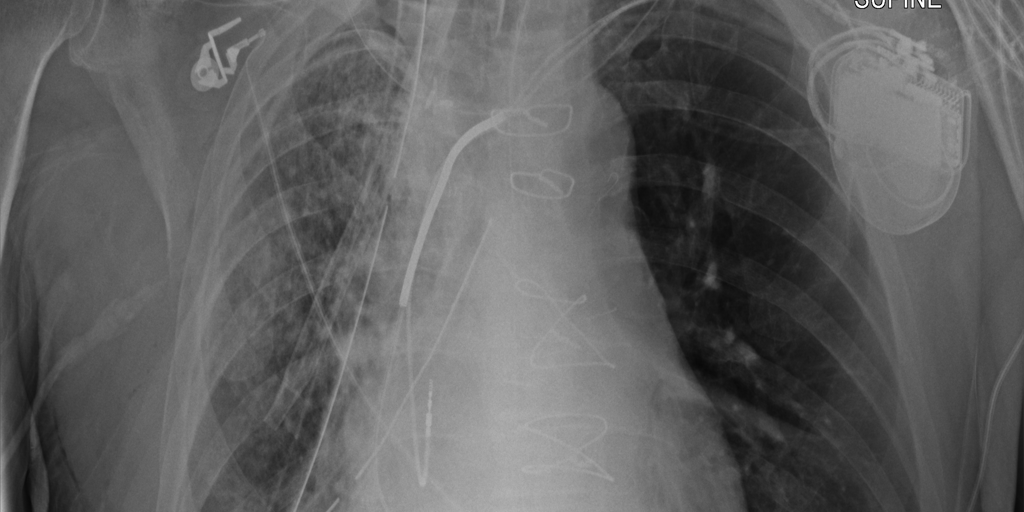

In [94]:
image = trans(img)
image

In [82]:
img_w, img_h = 512, 512
background = Image.new('RGBA',(1300, 1300), (255, 255, 255, 255))
bg_w, bg_h = background.size
for i in [14:17
offset = (i,(((bg_h - img_h)) / 2)-370)
background.paste(image[i - 14],offset)


SyntaxError: invalid syntax (<ipython-input-82-d9b08ae7968a>, line 4)

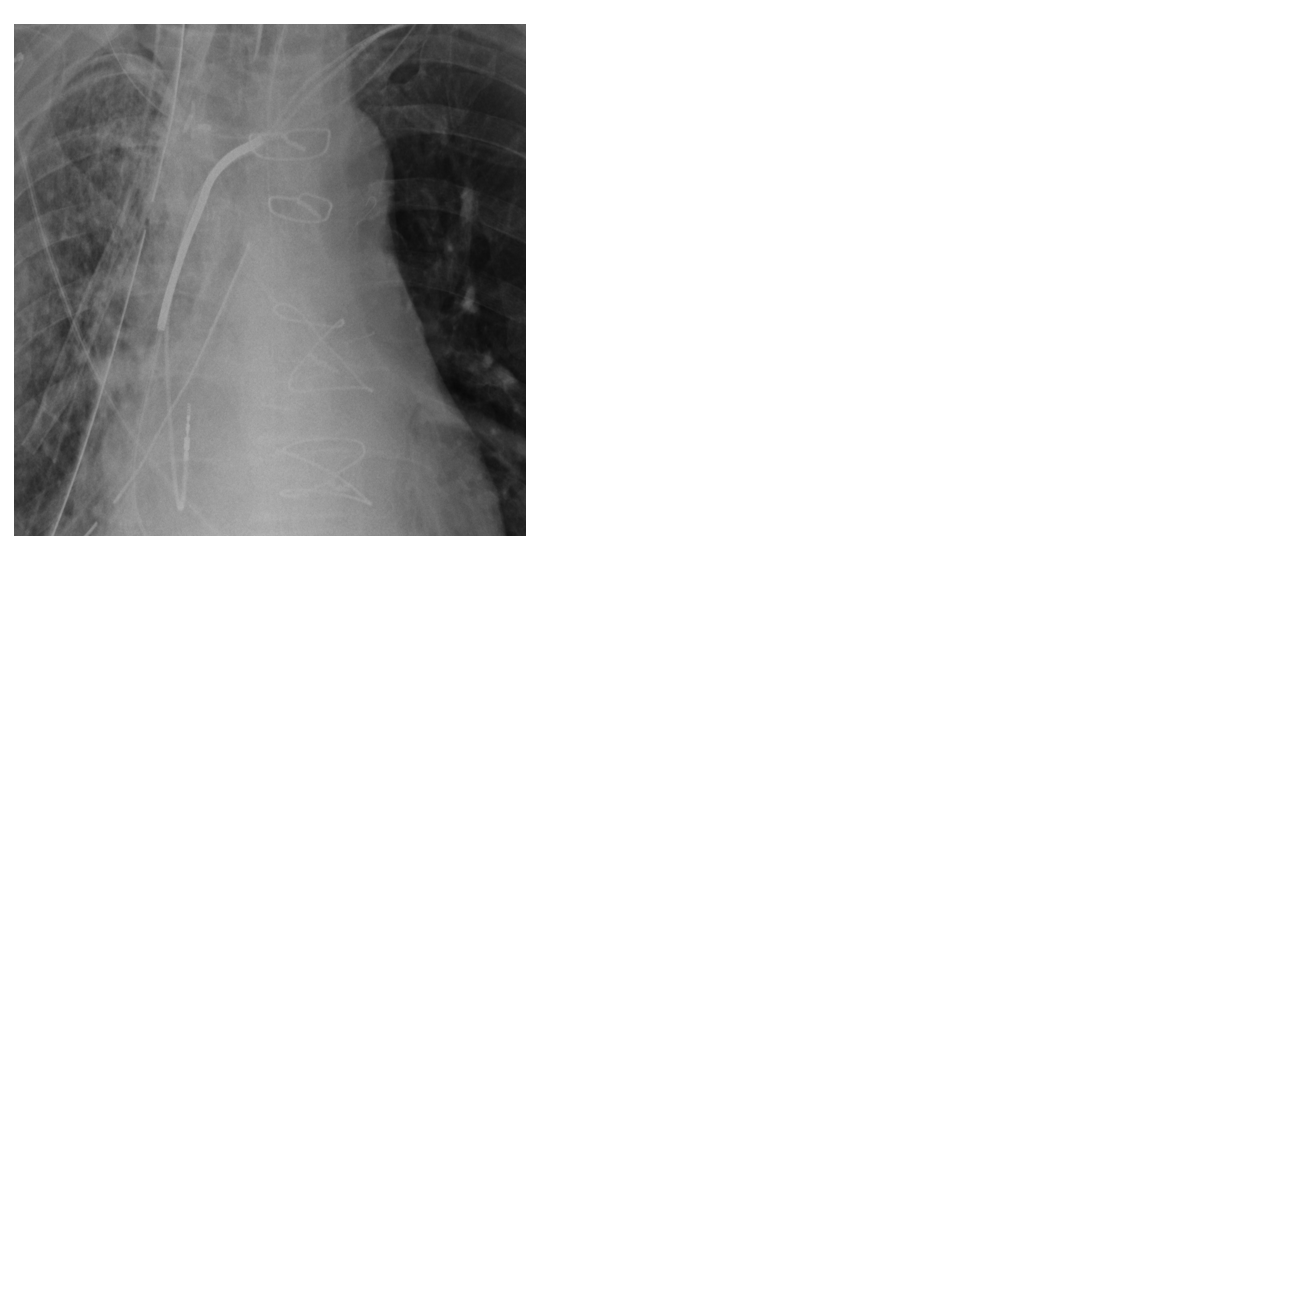

In [83]:
background

In [28]:
import torch

In [34]:
gt = torch.FloatTensor([[1],[0]])
other = 1 - gt
torch.cat([other, gt], dim=1)

tensor([[ 0.,  1.],
        [ 1.,  0.]])